# **Modelling and Evaluation V3**

## Objectives

* Answer business requirement 1:
    * The client aims to create a machine learning model that can visually differentiate a benign skin lesion from a malignant one using the lesion images. The model should be capable of reaching an accuracy of at least 90%.
<br><br>

* Answer business requirement 2:
    - The model should provide a confidence level for each prediction.
<br><br>

* Answer business requirement 3:
    - If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation. The precision of these recommendations should be over 85%.
<br><br>

* Answer business requirement 6:
    - The AI model's insights should assist healthcare professionals in making informed decisions about the treatment process.
<br><br>

* Answer business requirement 7:
    - The model's performance will be evaluated using balanced performance metrics such as F1 Score and AUC-ROC, aiming for scores above 0.85 and 0.9, respectively.
<br><br>
## Inputs

* inputs/skin_cancer_dataset/sorted_images/train
* inputs/skin_cancer_dataset/sorted_images/test
* inputs/skin_cancer_dataset/sorted_images/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* V3 - Xception architecture as its base
<br><br>

* This model can be used for image classification tasks where you have multiple classes. It leverages the power of a pre-trained Xception model and fine-tunes it with additional custom layers to suit the specific classification problem.

---

---

# Import regular packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

---

# Change working directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis/jupyter_notebooks'

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis'

---

## Set input directories

Set train, validation and test paths.

In [6]:
my_data_dir = 'inputs/skin_cancer_dataset/sorted_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'modelling_evaluation_v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set label names

In [8]:
# Set the labels
train_labels = os.listdir(train_path)
print('Label for train set the images are', train_labels, 'there are', len(train_labels) )
test_labels = os.listdir(test_path)
print('Label for test set the images are', test_labels, 'there are', len(test_labels) )
val_labels = os.listdir(val_path)
print('Label for val set the images are', val_labels, 'there are', len(val_labels) )

Label for train set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for test set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for val set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7


## Set image shape

In [9]:
image_shape = (225, 300, 3)
image_shape

(225, 300, 3)

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/modelling_evaluation_v3/image_shape.pkl']

In [11]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"{file_path}/image_shape.pkl")
image_shape

(225, 300, 3)

---

## Build training, validation and test set

In [37]:
import tensorflow as tf

img_height = 225
img_width = 300
batch_size = 32

my_seed = 123
np.random.seed(my_seed)
tf.random.set_seed(my_seed)

# Load the training dataset
df_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Load the validation dataset
df_val = tf.keras.utils.image_dataset_from_directory(
    val_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Load the test dataset
df_test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Extract class names
class_names = df_train.class_names

# Define normalization layer
normalization_layer = tf.keras.layers.Rescaling(scale=1./255, offset=0)

# Normalize the datasets
df_train = df_train.map(lambda x, y: (normalization_layer(x), y))
df_val = df_val.map(lambda x, y: (normalization_layer(x), y))
df_test = df_test.map(lambda x, y: (normalization_layer(x), y))


Found 7007 files belonging to 7 classes.
Found 998 files belonging to 7 classes.
Found 2010 files belonging to 7 classes.


In [13]:
# check if data was loaded correctly
y = np.concatenate([y for x, y in df_train], axis=0)
print(len(y))
print(len(df_train))
ranges = [0] * 7
for class_id in np.unique(y, axis=0):
    for cl in y:
        if (class_id == cl):
            ranges[class_id] += 1
    
print(ranges)
print(sum(ranges))

2023-06-17 01:35:02.145800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7007]
	 [[{{node Placeholder/_4}}]]
2023-06-17 01:35:02.146254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7007]
	 [[{{node Placeholder/_0}}]]


7007
219
[228, 359, 769, 80, 779, 4693, 99]
7007


---

# Model creation

---

## ML model

### Import model packages

In [14]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
import tensorflow as tf

### Model

In [24]:
def create_tf_model(num_classes, input_shape=image_shape):
    # Defining base model using Xception module from Keras
    base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = True
    
    # Initialize the Sequential model
    model = Sequential()
    
    # Adding the base model
    model.add(base_model)

    # Adding Flatten Layer
    model.add(Flatten())

    # Adding Dense Layers
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Output Layer
    model.add(Dense(num_classes))

    # Compiling the model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])

    # Return the compiled model
    return model

### Model Summary

In [25]:
create_tf_model(num_classes=7).summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 10, 2048)       20861480  
                                                                 
 flatten_6 (Flatten)         (None, 143360)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               18350208  
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_34 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                      

In [26]:
model = create_tf_model(num_classes=7)

model.fit(df_train,
          epochs=30,
          validation_data=df_val,
          )

Epoch 1/30
219/219 [==============================] - ETA: 0s - loss: 0.8978 - accuracy: 0.6980

2023-06-17 02:23:24.525858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [998]
	 [[{{node Placeholder/_4}}]]
2023-06-17 02:23:24.526530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [998]
	 [[{{node Placeholder/_0}}]]


219/219 [==============================] - 2128s 10s/step - loss: 0.8978 - accuracy: 0.6980 - val_loss: 1.4964 - val_accuracy: 0.5962
Epoch 2/30
219/219 [==============================] - 2037s 9s/step - loss: 0.6342 - accuracy: 0.7758 - val_loss: 0.8486 - val_accuracy: 0.7395
Epoch 3/30
219/219 [==============================] - 1978s 9s/step - loss: 0.5154 - accuracy: 0.8237 - val_loss: 0.7843 - val_accuracy: 0.7525
Epoch 4/30
219/219 [==============================] - 1890s 9s/step - loss: 0.4244 - accuracy: 0.8540 - val_loss: 0.8464 - val_accuracy: 0.7415
Epoch 5/30
219/219 [==============================] - 1870s 9s/step - loss: 0.3282 - accuracy: 0.8874 - val_loss: 1.1974 - val_accuracy: 0.7204
Epoch 6/30
219/219 [==============================] - 1853s 8s/step - loss: 0.2770 - accuracy: 0.9078 - val_loss: 0.9272 - val_accuracy: 0.7214
Epoch 7/30
219/219 [==============================] - 1838s 8s/step - loss: 0.2153 - accuracy: 0.9321 - val_loss: 0.7790 - val_accuracy: 0.7605
Ep

## Save model

In [27]:
model.save(f'{file_path}/lesion_classifier_model.h5')

---

## Model Performance

---

## Model learning curve

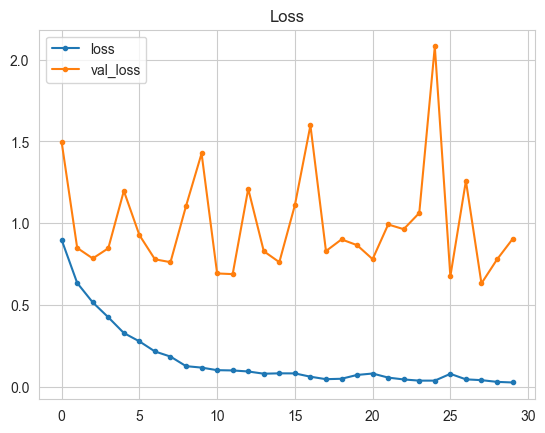

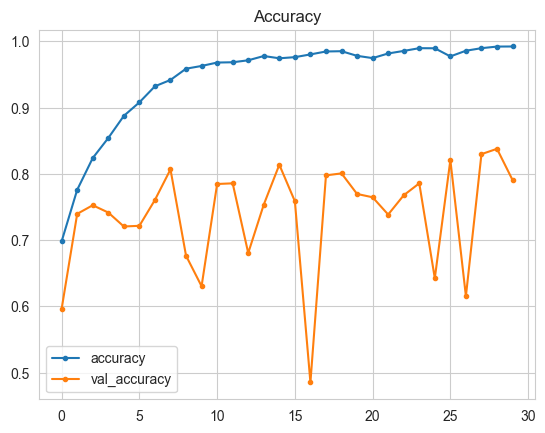

In [28]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load Model

In [29]:
from keras.models import load_model
model = load_model(f"{file_path}/lesion_classifier_model.h5")

### Evaluate Model

In [30]:
evaluation = model.evaluate(df_test)

2023-06-18 12:44:53.228064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2010]
	 [[{{node Placeholder/_4}}]]
2023-06-18 12:44:53.228403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2010]
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 83s 1s/step - loss: 0.8369 - accuracy: 0.7940


### Save evaluation pickle

In [31]:
joblib.dump(value=evaluation,
            filename=f"{file_path}/evaluation.pkl")

['outputs/modelling_evaluation_v3/evaluation.pkl']

## Predict on new data

1/1 [==============================] - 0s 67ms/step


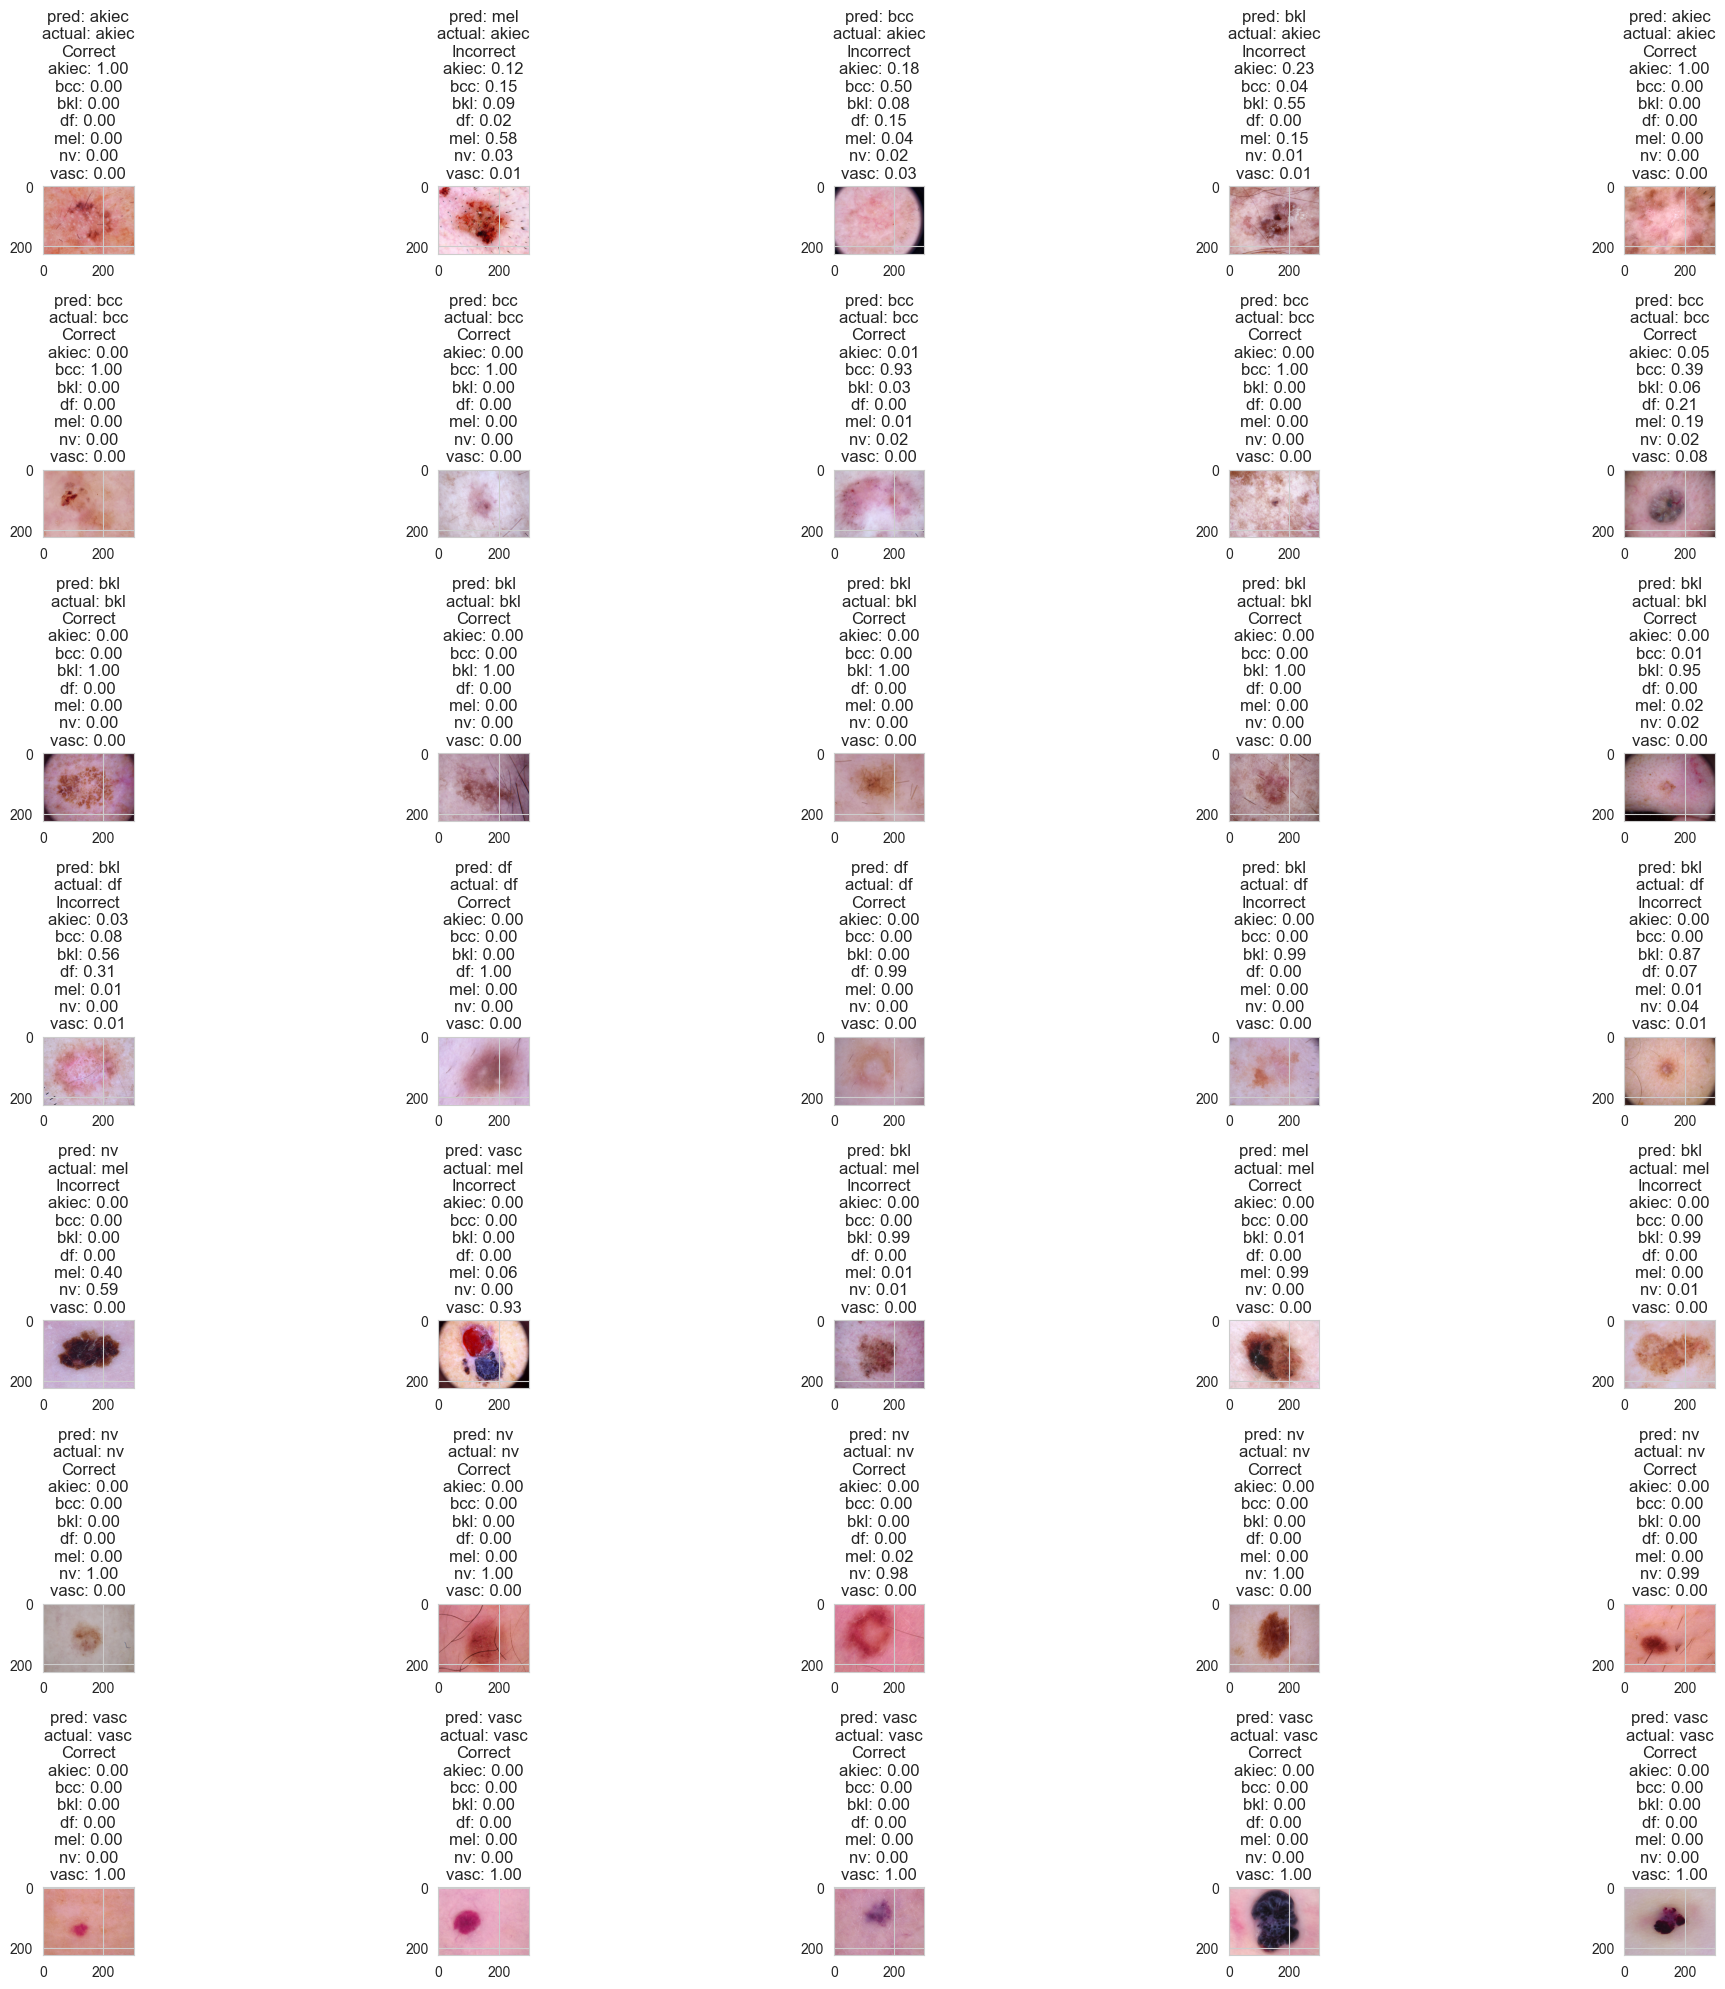

In [41]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Create mapping dictionary
target_map = {v: k for v, k in enumerate(class_names)}

f, ax = plt.subplots(7, 5)  # 7 rows for 7 classes, 5 columns for 5 images each
f.set_size_inches(20, 20)  # adjust size for better display

# counters for each class
correct_counts = {label: 0 for label in class_names}
total_counts = {label: 0 for label in class_names}

# assuming train_labels contains the names of the 7 classes
for row, label in enumerate(class_names):
    image_files = os.listdir(test_path + '/' + label)

    # Select 5 random indices
    random_indices = random.sample(range(len(image_files)), 5)

    for col, idx in enumerate(random_indices):
        pil_image = image.load_img(test_path + '/' + label + '/' + image_files[idx], target_size=image_shape, color_mode='rgb')
        
        my_image = image.img_to_array(pil_image)
        my_image = np.expand_dims(my_image, axis=0)/255
        
        #pred_proba = model.predict(my_image)[0]
        pred_logits = model.predict(my_image)[0]
        # Convert logits to probabilities
        pred_proba = softmax(pred_logits)
        
        pred_class_index = np.argmax(pred_proba)  # find the index with max probability
        pred_class = target_map[pred_class_index]
        
        
        # Text for probabilities
        probabilities_text = '\n'.join([f"{target_map[i]}: {p:.2f}" for i, p in enumerate(pred_proba)])

        # Check if prediction is correct
        is_correct = pred_class == label
        if is_correct:
            correct_counts[label] += 1
        total_counts[label] += 1
        
        # Check if prediction is correct
        is_correct = 'Correct' if pred_class == label else 'Incorrect'
        
        # Here I include the predicted class (pred_class), the actual class (label), and the probabilities
        ax[row, col].imshow(pil_image)
        ax[row, col].set_title(f"pred: {pred_class}\nactual: {label}\n{is_correct}\n{probabilities_text}")
        

plt.tight_layout()
plt.show()

## Predict on new data summary

In [42]:
# Calculate and print accuracy for each class
total_correct = 0
for label in train_labels:
    total_correct = total_correct + correct_counts[label] 
    accuracy = (correct_counts[label] / total_counts[label]) * 100 if total_counts[label] > 0 else 0
    print(f"Accuracy for class {label}: {accuracy:.2f}% ({correct_counts[label]}/{total_counts[label]})")
    
total_accuracy = (total_correct / 35) * 100 if total_correct > 0 else 0
print()
print(f"Total correct: {total_correct}")
print(f"Accuracy total: {total_accuracy:.2f}% ({total_correct}/35)")

Accuracy for class akiec: 40.00% (2/5)
Accuracy for class df: 40.00% (2/5)
Accuracy for class bkl: 100.00% (5/5)
Accuracy for class vasc: 100.00% (5/5)
Accuracy for class nv: 100.00% (5/5)
Accuracy for class bcc: 100.00% (5/5)
Accuracy for class mel: 20.00% (1/5)

Total correct: 25
Accuracy total: 71.43% (25/35)


---

---

NOTE

High Accuracy Classes: The model performed exceptionally well on classes 'bkl', 'vasc', 'nv', and 'bcc'. This indicates that the model is capable of identifying these classes accurately and has learned relevant features for these categories.

Moderate Accuracy Classes: The classes 'akiec' and 'df' exhibited a moderate accuracy. This suggests that there is some room for improvement in the model's ability to correctly classify these categories.

Low Accuracy Class: The model performed poorly in classifying the 'mel' class. This suggests that the model has difficulty distinguishing features unique to the 'mel' class.

Overall Performance: The overall accuracy indicates that the model is relatively accurate but can be improved, especially in the 'mel' class. The model doesnt furfill:

**Business Requirement 1**: The client aims to create a machine learning model that can visually differentiate a benign skin lesion from a malignant one using the lesion images. The model should be capable of reaching an accuracy of at least 90%.

**Business Requirement 3**: If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation. The precision of these recommendations should be over 85%.

Malignant lesions are the most dangerous and must have a high confidence and accuracy.

---